In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip install tensorflow keras 

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [2]:
# Insira aqui o pandasDataFrame.
df_data_1 = pd.read_csv('tnt-iot.csv')
# df_data_1 = pd.read_csv('training_dataset.csv')
df_data_1.head()

Tempo     Estação      LAT        LONG  Movimentação  Original_473  \
0   2019-3-17  Faria Lima -23.5675    -46.6929         53130            25   
1   2018-5-21   Pinheiros -23.5664 -46703.0000         77146            86   
2   2019-10-5  Faria Lima -23.5675    -46.6929         54136            34   
3  2019-10-30  Faria Lima -23.5675    -46.6929         54694            77   
4    2019-7-7   Pinheiros -23.5664 -46703.0000         79190            66   

   Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  Pêssego  \
0            19    31           3         21      30             2       35   
1             6    16          23         24      27            30       20   
2            38    12          26         38      28            16       41   
3             3    40          33         23       6            43       24   
4            55    46           5          6       7            13       13   

        TARGET  
0       NORMAL  
1  REABASTECER  
2       NORMAL  
3  REABASTECER  
4  REABASTECER

In [3]:
df_training_dataset = df_data_1
df_training_dataset.tail()

Tempo      Estação      LAT     LONG  Movimentação  Original_473  \
10170   2019-4-7  Tamanduateí -23.5929 -46.5897         51603            20   
10171   2018-5-6        Moema -23.5489 -46.6388         18819            86   
10172  2018-6-26        Moema -23.5489 -46.6388         20788             7   
10173  2019-7-27  Tamanduateí -23.5929 -46.5897         52470            67   
10174  2018-9-22        Moema -23.5489 -46.6388         19438            16   

       Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  \
10170            65     1          25         14      37            43   
10171            44    18           2         43      43            43   
10172            65    57           9         25      23             9   
10173            56     3          13         43      13            19   
10174            39    33          19          9      21            13   

       Pêssego       TARGET  
10170       43  REABASTECER  
10171       12  REABASTECER  
10172       20  REABASTECER  
10173       11  REABASTECER  
10174       17       NORMAL

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         10175 non-null  object 
 1   Estação       10175 non-null  object 
 2   LAT           10175 non-null  float64
 3   LONG          10175 non-null  float64
 4   Movimentação  10175 non-null  int64  
 5   Original_473  10175 non-null  int64  
 6   Original_269  10175 non-null  int64  
 7   Zero          10175 non-null  int64  
 8   Maçã-Verde    10175 non-null  int64  
 9   Tangerina     10175 non-null  int64  
 10  Citrus        10175 non-null  int64  
 11  Açaí-Guaraná  10175 non-null  int64  
 12  Pêssego       10175 non-null  int64  
 13  TARGET        10175 non-null  object 
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df_training_dataset.nunique()

Tempo            720
Estação           25
LAT               25
LONG              25
Movimentação    7309
Original_473      81
Original_269      65
Zero              63
Maçã-Verde        43
Tangerina         42
Citrus            43
Açaí-Guaraná      42
Pêssego           42
TARGET             2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [7]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [8]:
df_training_dataset_imputed.tail()

Tempo      Estação      LAT     LONG  Movimentação  Original_473  \
10170   2019-4-7  Tamanduateí -23.5929 -46.5897         51603            20   
10171   2018-5-6        Moema -23.5489 -46.6388         18819            86   
10172  2018-6-26        Moema -23.5489 -46.6388         20788             7   
10173  2019-7-27  Tamanduateí -23.5929 -46.5897         52470            67   
10174  2018-9-22        Moema -23.5489 -46.6388         19438            16   

       Original_269  Zero  Maçã-Verde  Tangerina  Citrus  Açaí-Guaraná  \
10170            65     1          25         14      37            43   
10171            44    18           2         43      43            43   
10172            65    57           9         25      23             9   
10173            56     3          13         43      13            19   
10174            39    33          19          9      21            13   

       Pêssego       TARGET  
10170       43  REABASTECER  
10171       12  REABASTECER  
10172       20  REABASTECER  
10173       11  REABASTECER  
10174       17       NORMAL

In [9]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [10]:
df_training_dataset_rmcolumns.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
10170            20            65     1          25         14      37   
10171            86            44    18           2         43      43   
10172             7            65    57           9         25      23   
10173            67            56     3          13         43      13   
10174            16            39    33          19          9      21   

       Açaí-Guaraná  Pêssego       TARGET  
10170            43       43  REABASTECER  
10171            43       12  REABASTECER  
10172             9       20  REABASTECER  
10173            19       11  REABASTECER  
10174            13       17       NORMAL

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [11]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
# df_training['TARGET'] = df_training['TARGET'].replace({'REABASTECER': 1, 'NORMAL': 0})
df_training.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
10170            20            65     1          25         14      37   
10171            86            44    18           2         43      43   
10172             7            65    57           9         25      23   
10173            67            56     3          13         43      13   
10174            16            39    33          19          9      21   

       Açaí-Guaraná  Pêssego       TARGET  
10170            43       43  REABASTECER  
10171            43       12  REABASTECER  
10172             9       20  REABASTECER  
10173            19       11  REABASTECER  
10174            13       17       NORMAL

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [12]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [13]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=133)

### Treinando uma árvore de decisão

In [15]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)
dtc = RandomForestClassifier(max_depth=21).fit(X_train, y_train)
# dtc = XGBClassifier(n_estimators=96, random_state=133, max_depth=15).fit(X_train, y_train)
# n_estimators=96, random_state=133, 

### Fazendo previsões na amostra de teste

In [16]:
y_pred = dtc.predict(X_test)
print(y_pred)

['REABASTECER' 'NORMAL' 'NORMAL' ... 'REABASTECER' 'REABASTECER'
 'REABASTECER']


In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

array([0.8835413 , 0.77235772])

### Keras

In [ ]:
from sklearn import preprocessing

#Select numerical columns which needs to be normalized
train_norm = X_train
test_norm = X_test
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
X_test.update(testing_norm_col)
print (X_test.head())

In [ ]:
print (X_train.head())

In [ ]:
from numpy import loadtxt
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=32)
# model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=32)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(X_test, y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))

In [ ]:
# # Save the model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [ ]:
# y_pred = dtc.predict(X_test)
# print(y_pred)
np.set_printoptions(threshold=np.inf)

y_pred = np.argmax(model.predict(X_test), axis = 1)
print(y_pred)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

### Analisando a qualidade do modelo através da matriz de confusão

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

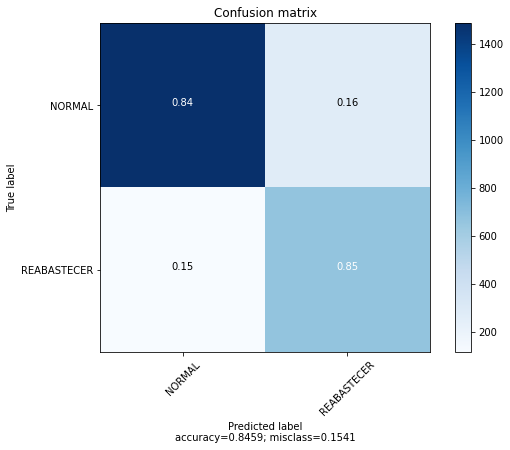

In [20]:
from sklearn.metrics import confusion_matrix

# y_test = y_test.replace({1: 'REABASTECER', 0: 'NORMAL'})
# y_pred = y_pred.replace({1: 'REABASTECER', 0: 'NORMAL'})
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [21]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-11 21:40:36--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'to_be_scored.csv'

to_be_scored.csv        [ <=>                ]  68.64K  --.-KB/s    in 0.03s   

2020-09-11 21:40:37 (2.19 MB/s) - 'to_be_scored.csv' saved [70291]



Tempo             Estação      LAT     LONG  Movimentação  \
979  2019-8-19  Hospital São Paulo -23.5984 -46.6455         26787   
980  2019-8-20  Hospital São Paulo -23.5984 -46.6455         26629   
981  2019-8-21  Hospital São Paulo -23.5984 -46.6455         27517   
982  2019-8-22  Hospital São Paulo -23.5984 -46.6455         26860   
983  2019-8-23  Hospital São Paulo -23.5984 -46.6455         24571   

     Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

In [22]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

Tempo             Estação      LAT     LONG  Movimentação  \
979  2019-8-19  Hospital São Paulo -23.5984 -46.6455         26787   
980  2019-8-20  Hospital São Paulo -23.5984 -46.6455         26629   
981  2019-8-21  Hospital São Paulo -23.5984 -46.6455         27517   
982  2019-8-22  Hospital São Paulo -23.5984 -46.6455         26860   
983  2019-8-23  Hospital São Paulo -23.5984 -46.6455         24571   

     Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [23]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [24]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [25]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [26]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [27]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego       TARGET  
979             6        2  REABASTECER  
980            43       43       NORMAL  
981            37       37  REABASTECER  
982            33       33  REABASTECER  
983            27       27       NORMAL

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [31]:
# project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.to_csv('results.csv', index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
